**NOME:**  Eduardo Fontes Baltazar da Silveira

## Dependências

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForSeq2SeqLM

from tabulate import tabulate
from google.colab import widgets as cwidgets

import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets, interactive_output

## Definições das Funções

In [ ]:
COLORS = [5,9,34,62,93,208]

# Formata a string para ter uma cor de fundo
def colored(txt: str, idx: int):
    color = COLORS[idx%len(COLORS)]
    return f"\x1B[1m\x1B[48;5;{color}m{txt}\x1B[0m"

In [ ]:
# Novo modelo e tokenizador
MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

In [ ]:
# Separa uma string em tokens e imprime cada token com uma cor de fundo
def print_colored_tokens(text: str):
    # Realiza a tokenização
    tokens = tokenizer.tokenize(text)

    # Imprime os tokens com diferentes cores
    print('\x1B[1mDivisão do Texto\x1B[0m:\t', end='')
    for idx, token in enumerate(tokens):
        print(colored(token.replace("▁", " "), idx), end='')

    print('\n\x1B[1mTokens Ids\x1B[0m:\t\t' + str(tokenizer(text)['input_ids'][:-1]))

In [ ]:
import matplotlib.pyplot as plt
def print_input_embeddings(text, hidden_states):
    #Tokeniza o texto
    tokens = tokenizer.tokenize(text)

    # Inicializa a lista de dados para a tabela de embeddings
    # Adiciona os tokens como headers e prepara lista vazias para
    # receberem os embeddings

    embed_size = 150

    fig, axs = plt.subplots(len(tokens), 1, figsize=(15,len(tokens)//1.2))
    fig.patch.set_visible(False)
    # Itera sobre os tokens e embeddings para preencher a tabela
    for i, token in enumerate(tokens):
        token_embedding = hidden_states[0][0][i+1, :embed_size].unsqueeze(0).tolist()
        img = axs[i].imshow(token_embedding, cmap='Spectral', extent=[0,embed_size,0,embed_size//20])
        axs[i].set_frame_on(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_ylabel(token, rotation=0, verticalalignment='center', horizontalalignment='right')


    plt.colorbar(img, ax=axs)
    plt.show()

In [ ]:
# @title Primeiramente vamos selecionar um texto para tradução, o qual será a entrada do modelo.
Input = "Welcome to the course! Let's have fun!" # @param @type {type: "string"}

### Tokens

Para que o transformer possa processar dados textuais, os mesmos devem ser transformados em vetores numéricos. Para isso, a entrada é dividida em **tokens** com base em um dicionário previamente definido.

Os dicionários costumam ser únicos para cada modelo e as palavras ou sub-palavras presentes neles são escolhidas pela taxa de ocorrência das mesmas nos dados de treinamento. Os dicionários mapeiam cada token (palavra ou sub-palavra) para um índice (token id).


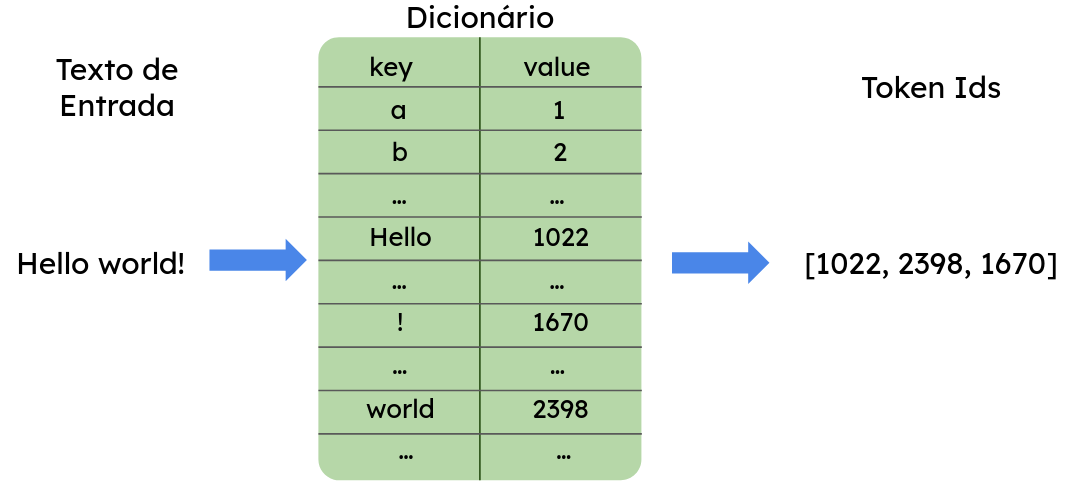

In [ ]:
print_colored_tokens(Input)

Divisão do Texto:	welcometothecourse!let'shavefun!
Tokens Ids:		[101, 6160, 2000, 1996, 2607, 999, 2292, 1005, 1055, 2031, 4569, 999]
